In [15]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import linkage , dendrogram
from sklearn.metrics import silhouette_score

In [16]:
#Load the data
data=pd.read_csv(r'C:\Users\ASUS\OneDrive\Documents\Exercise\Time Series Forecasting\Clustering data\Mall_Customers.csv')

#Preview first few rows
data.head()

#Cheking data info(columns,types,non-null counts)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


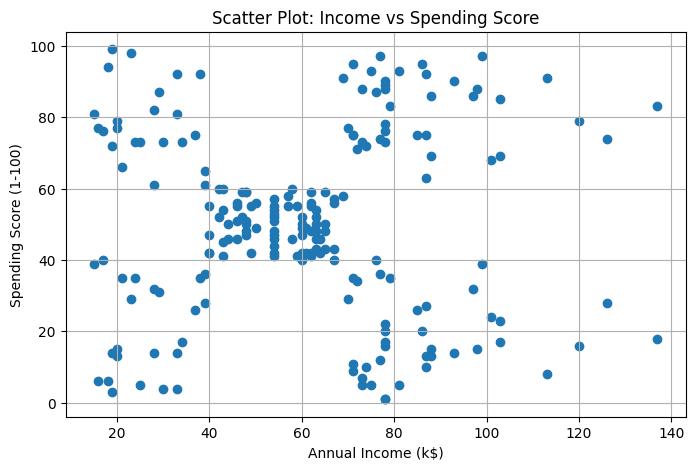

In [17]:
#Plot Annual Income vs spending score

plt.figure(figsize=(8,5))
plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=data)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot: Income vs Spending Score')
plt.grid(True)
plt.show()



In [ ]:
#How many null values are present in the data
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
#Drop any column with missing value
data.dropna(axis=1,how='any') 

#Drop any row with missing value
data.dropna(axis=0,how='any')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [20]:
#Numerical data to mamke pairplot
numeric_data=data[['Age','Annual Income (k$)','Spending Score (1-100)']] 

#Scale the numerical data
Scaled_data=StandardScaler().fit_transform(numeric_data)


<Figure size 1000x1000 with 0 Axes>

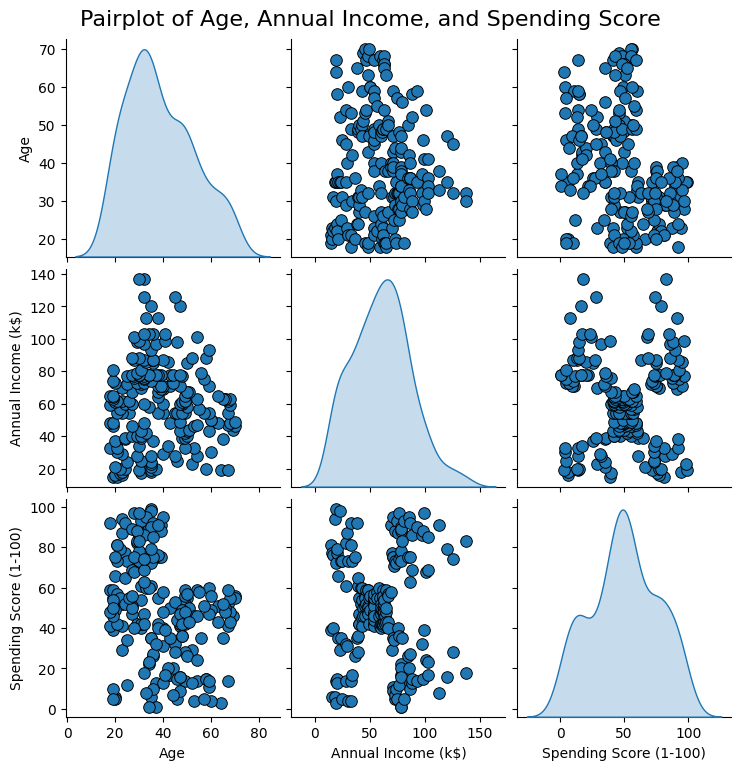

In [ ]:

# Pairplot for numeric features to visualize distribution, pattern and trend


plt.figure(figsize=(10,10))
pairplot = sns.pairplot(
    numeric_data,                  
    vars=['Age','Annual Income (k$)','Spending Score (1-100)'],  
    kind='scatter',               
    diag_kind='kde',                
    plot_kws={'edgecolor':'k', 's':70}  
)
pairplot.fig.suptitle('Pairplot of Age, Annual Income, and Spending Score', y=1.02, fontsize=16)
plt.show()



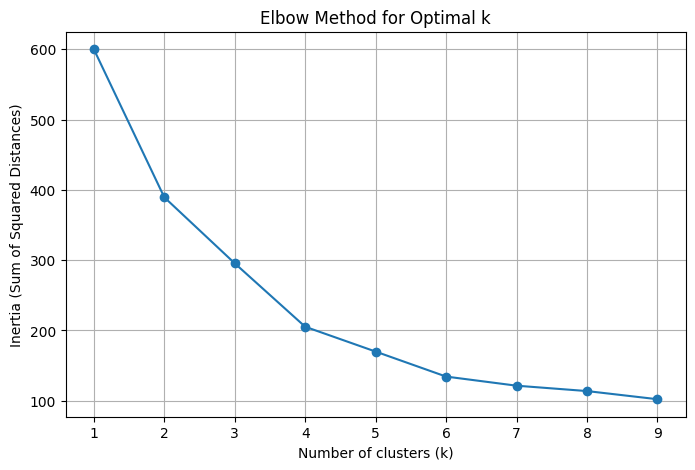

In [ ]:
#Elbow method for KMeans

inertia=[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(Scaled_data)
    inertia.append(kmeans.inertia_)  #SSD of all points from the center of the data.It measures the compactness of a cluste


#Plot the elbow to find the appropriate k 

plt.figure(figsize=(8,5))
plt.plot(range(1,10), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

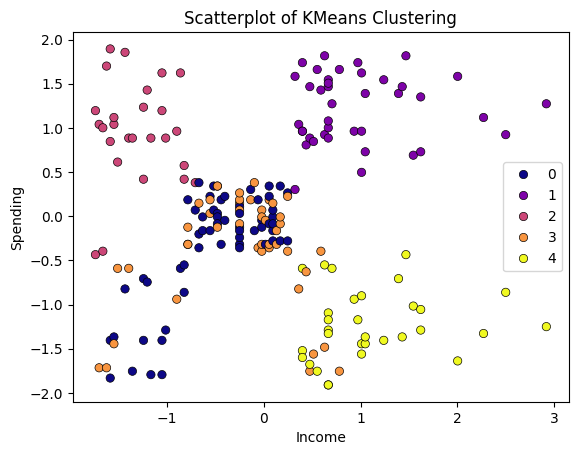

In [23]:
#KMeans Clustering
Kmeans=KMeans(n_clusters=5,random_state=42).fit_predict(Scaled_data)

#Plot of KMeans Clustering
sns.scatterplot(x=Scaled_data[:,1],y=Scaled_data[:,2],edgecolors='k',hue=Kmeans,palette='plasma')#Scaling[:1]=Annual Income (k$) and Scaling[:,2]=Spending Score, in sns we have to write x= and y=
plt.xlabel('Income')
plt.ylabel('Spending')
plt.title('Scatterplot of KMeans Clustering')
plt.show()

#browns are elite they have high income and high spending-caucious for luxury, yellow has low income and spending and income , but teal has low income but high spending , the blue and orange are middle class


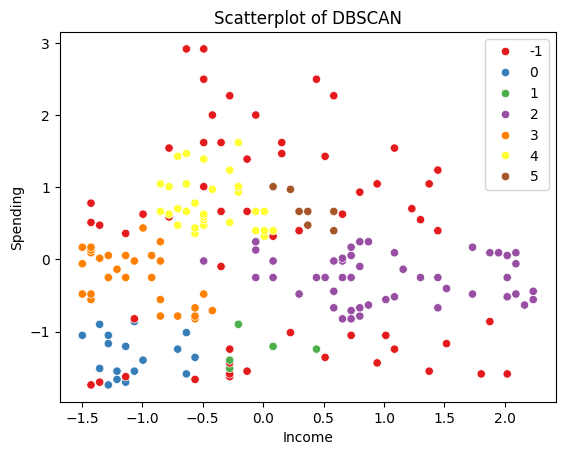

In [24]:
#DBSCAN Clustering
Db=DBSCAN(eps=0.5,min_samples=5).fit_predict(Scaled_data)

#Plot the DBSCAN Clustering
sns.scatterplot(x=Scaled_data[:,0],y=Scaled_data[:,1],hue=Db,palette='Set1')
plt.title('Scatterplot of DBSCAN')
plt.xlabel('Income')
plt.ylabel('Spending')
#plt.legend(title='Cluster',loc='upper right',bbox_to_anchor=(1015,1),borderaxespad=10)
plt.show()

#-1= noise in the plot

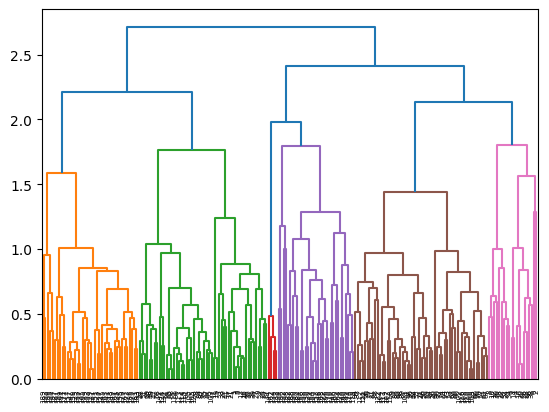

In [25]:
#Hierarchical Clustering with linkage function and average method
h=linkage(Scaled_data,method='average')

#Plotting dendrogram 
dendrogram(h)
plt.show()

In [26]:
#Evaluation of DbScan and KMeans with Silhouette Score 
KMeans_Silhouette=silhouette_score(Scaled_data,Kmeans)
DBSCAN_Silhouette=silhouette_score(Scaled_data,Db)


print('Kmeans Silhouette Score:',KMeans_Silhouette)
print('DBSCAN silhouetteS_Score:',DBSCAN_Silhouette)

#whoever contains higher silhouette score , gets good fit for the cluster and differed as good from the other cluster

Kmeans Silhouette Score: 0.40846873777345605
DBSCAN silhouetteS_Score: 0.18451372756506046
